In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot
df = pd.read_csv('teen_phone_addiction_dataset.csv')
data = df['Screen_Time_Before_Bed']
print(len(data))
print(data.isnull().sum())

3000
0


In [8]:
print("Среднее значение", data.mean())
print("Дисперсия", data.var())
print("Мода", data.mode()[0] if not data.mode().empty else np.nan)
print("Медиана", data.median())
quantilies = data.quantile([0.25, 0.5, 0.75])
print("Квантили", quantilies.values)
print("Эксцесс",stats.kurtosis(data, bias=False))
print("Ассиметрия", stats.skew(data, bias=False))
print("Интерквартильный размах", quantilies[0.75] - quantilies[0.25])

Среднее значение 1.0067333333333335
Дисперсия 0.24292897187951537
Мода 1.0
Медиана 1.0
Квантили [0.7 1.  1.4]
Эксцесс -0.34892061653376416
Ассиметрия 0.09842852601950872
Интерквартильный размах 0.7


Text(0.5, 0, 'Screen hours before bed')

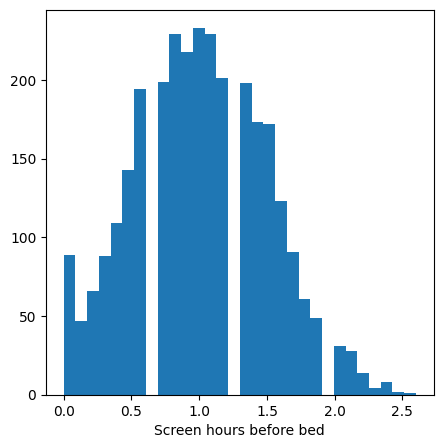

In [18]:
plt.figure(figsize=(5, 5))
plt.hist(data, bins=30)
plt.xlabel('Screen hours before bed')

Text(0.5, 0, 'Screen hours before bed')

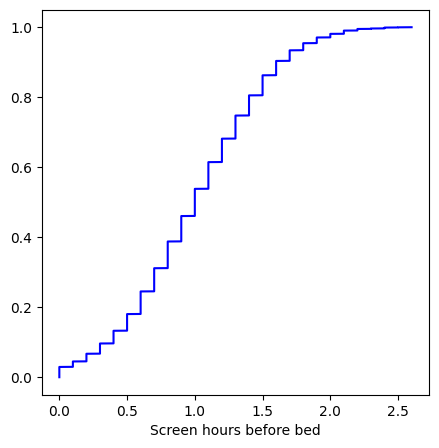

In [19]:
plt.figure(figsize=(5, 5))
sorted_data = sorted(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, y, color='blue')
plt.xlabel('Screen hours before bed')

In [21]:
mean = data.mean()
std = np.sqrt(data.var())
n = len(data)

#Разбиваем данные на интервалы
bins = 10
hist, bin_edges = np.histogram(data, bins = bins, density=False)
observed = hist #наблдаемые частоты

# Вычисляем ожидаемые частоты
expected = []
for i in range(len(bin_edges) - 1):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    prob = stats.norm.cdf(right, mean, std) - stats.norm.cdf(left, mean, std)
    expected.append(prob * n)

expected = np.array(expected)

if any(e < 5 for e in expected):
    print("Предупреждение: некоторые ожидаемые частоты < 5, попробуйте увеличить bins или объединить интервалы")

#Статистика хи квадрат
chi_square_stat = np.sum((observed - expected)**2 / expected)
df_chi = len(observed) - 1 - 2
critical_value = stats.chi2.ppf(1 - 0.05, df_chi)

print(f"Статистика хи-квадрат: {chi_square_stat:.2f}")
print(f"Критическое значение (alpha=0.05, df={df_chi}): {critical_value:.2f}")
if chi_square_stat > critical_value:
    print("Отвергаем гипотезу о нормальности (данные не нормальны)")
else:
    print("Не отвергаем гипотезу о нормальности")


Статистика хи-квадрат: 153.96
Критическое значение (alpha=0.05, df=7): 14.07
Отвергаем гипотезу о нормальности (данные не нормальны)


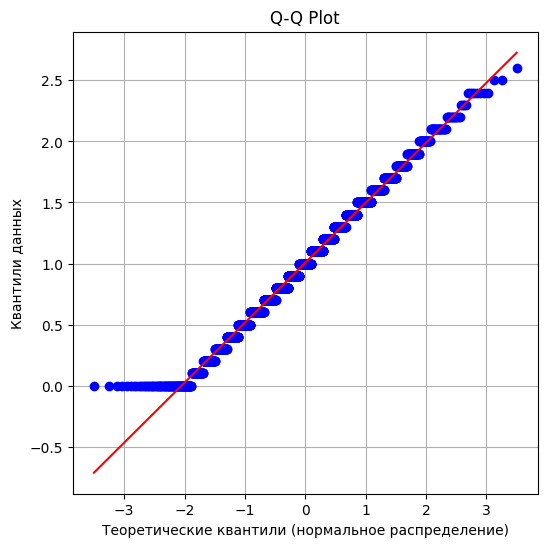

In [26]:
plt.figure(figsize=(6, 6))  # Размер графика
probplot(data, dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.ylabel('Квантили данных')
plt.grid(True)

In [29]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr
print(f"Количество выбросов: {((data < lower_bound) | (data > upper_bound)).sum()} из {len(data)}")
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
len(filtered_data)

Количество выбросов: 3 из 3000


2997

In [28]:
print("Среднее значение", filtered_data.mean())
print("Дисперсия", filtered_data.var())
print("Мода", filtered_data.mode()[0] if not filtered_data.mode().empty else np.nan)
print("Медиана", filtered_data.median())
quantilies_filtered = filtered_data.quantile([0.25, 0.5, 0.75])
print("Квантили", quantilies.values)
print("Эксцесс",stats.kurtosis(filtered_data, bias=False))
print("Ассиметрия", stats.skew(filtered_data, bias=False))
print("Интерквартильный размах", quantilies_filtered[0.75] - quantilies_filtered[0.25])

Среднее значение 1.0052052052052052
Дисперсия 0.2408340449929235
Мода 1.0
Медиана 1.0
Квантили [0.7 1.  1.4]
Эксцесс -0.3934129196286875
Ассиметрия 0.07891392720321103
Интерквартильный размах 0.7


In [30]:
mean = filtered_data.mean()
std = np.sqrt(filtered_data.var())
n = len(filtered_data)

#Разбиваем данные на интервалы
bins = 10
hist, bin_edges = np.histogram(filtered_data, bins = bins, density=False)
observed = hist #наблдаемые частоты

# Вычисляем ожидаемые частоты
expected = []
for i in range(len(bin_edges) - 1):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    prob = stats.norm.cdf(right, mean, std) - stats.norm.cdf(left, mean, std)
    expected.append(prob * n)

expected = np.array(expected)

if any(e < 5 for e in expected):
    print("Предупреждение: некоторые ожидаемые частоты < 5, попробуйте увеличить bins или объединить интервалы")

#Статистика хи квадрат
chi_square_stat = np.sum((observed - expected)**2 / expected)
df_chi = len(observed) - 1 - 2
critical_value = stats.chi2.ppf(1 - 0.05, df_chi)

print("Критерий хи-квадрат:")
print(f"Статистика хи-квадрат: {chi_square_stat:.2f}")
print(f"Критическое значение (alpha=0.05, df={df_chi}): {critical_value:.2f}")
if chi_square_stat > critical_value:
    print("Отвергаем гипотезу о нормальности (данные не нормальны)")
else:
    print("Не отвергаем гипотезу о нормальности")


Критерий хи-квадрат:
Статистика хи-квадрат: 180.25
Критическое значение (alpha=0.05, df=7): 14.07
Отвергаем гипотезу о нормальности (данные не нормальны)


Text(0.5, 0, 'Screen hours before bed')

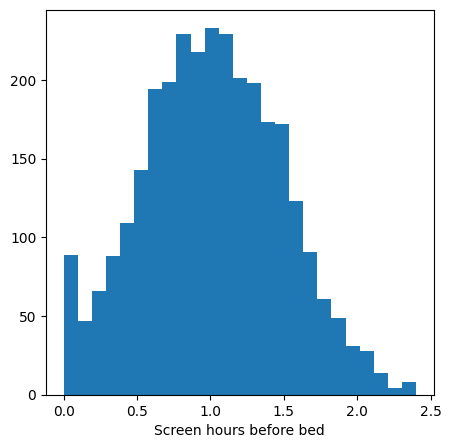

In [49]:
plt.figure(figsize=(5, 5))
plt.hist(filtered_data, bins=25)
plt.xlabel('Screen hours before bed')

Text(0.5, 0, 'Screen hours before bed')

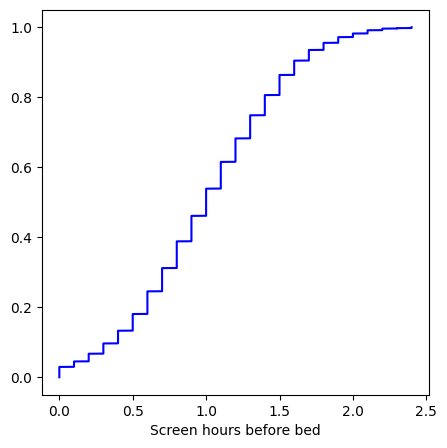

In [32]:
plt.figure(figsize=(5, 5))
sorted_filtered_data = sorted(filtered_data)
y = np.arange(1, len(sorted_filtered_data) + 1) / len(sorted_data)
plt.plot(sorted_filtered_data, y, color='blue')
plt.xlabel('Screen hours before bed')

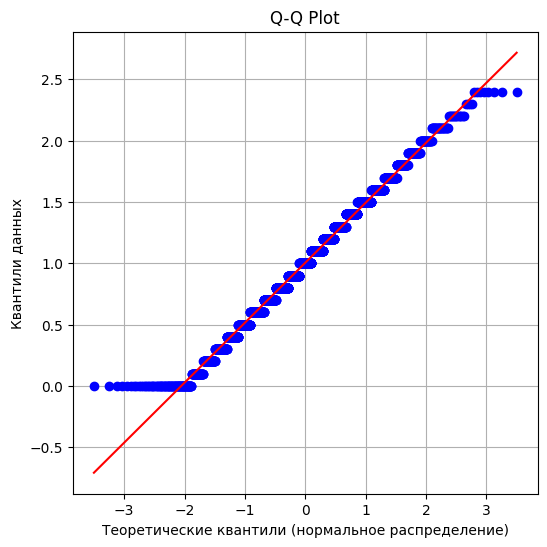

In [33]:
plt.figure(figsize=(6, 6))  # Размер графика
probplot(filtered_data, dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.ylabel('Квантили данных')
plt.grid(True)
plt.show()

In [34]:
df['School_Grade'].isna().sum()
grouped = df.groupby('School_Grade')['Screen_Time_Before_Bed']
stats = grouped.agg(['mean', 'var']).round(2)
print("Среднее и дисперсия по группам:")
print(stats)

Среднее и дисперсия по группам:
              mean   var
School_Grade            
10th          1.02  0.24
11th          1.02  0.23
12th          0.98  0.24
7th           1.01  0.25
8th           1.01  0.24
9th           1.01  0.24


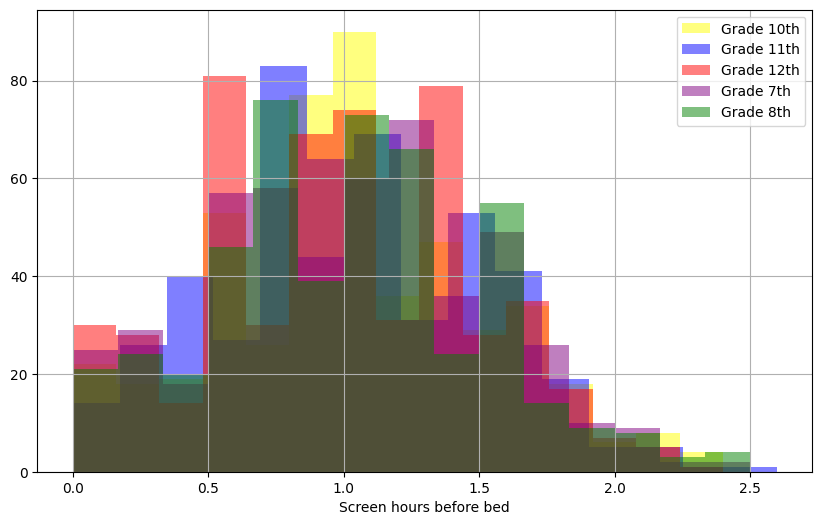

In [50]:
plt.figure(figsize=(10, 6))
colors = ['yellow', 'blue', 'red', 'purple', 'green']
for (grade, group), color in zip(grouped, colors[:len(grouped)]):
    group.hist(bins=15, alpha=0.5, label=f'Grade {grade}', color=color)
plt.xlabel('Screen hours before bed')
plt.legend()